<a href="https://colab.research.google.com/github/ankita1120/almabetter/blob/main/World_Bank_Global_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - World Bank Global Education Analysis

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

The World Bank EdStats All Indicator Query dataset contains over 4,000 globally comparable education indicators, covering access, progression, completion, literacy, teachers, population, and expenditures. This project explores variations in education indicators across countries to identify trends and disparities using machine learning techniques.

Objective:

The goal is to analyze global education data, uncover patterns, and apply machine learning models to predict key education indicators and identify influential factors.

Methodology:

Data Cleaning: Handling missing values, standardizing formats, and filtering key indicators.

Exploratory Data Analysis (EDA): Identifying trends in education spending, literacy rates, and student-teacher ratios.

Feature Engineering: Selecting and transforming variables to enhance predictive power.

Machine Learning Models:

Regression Models: Predicting literacy rates and education expenditures using algorithms such as Linear Regression, Decision Tree Regression, and Random Forest Regression.

Classification Models: Identifying countries at risk of low education outcomes using models like Logistic Regression, Decision Trees, and Support Vector Machines (SVM).

Unsupervised Learning:

Clustering: Applying K-Means and Hierarchical Clustering to group countries based on education indicators for similarity analysis.

Principal Component Analysis (PCA): Reducing dimensionality and identifying the most influential features in education data.

Visualization: Using bar charts, heatmaps, line charts, box plots, scatter plots, and correlation matrices to extract insights.

Key Findings

Machine learning models can predict literacy rates with high accuracy based on economic and social factors.

Clustering techniques reveal patterns in education investment among high-income and low-income countries.

Lower student-teacher ratios improve learning outcomes, as identified by predictive modeling.

GDP per capita significantly impacts education indicators, but policy effectiveness remains a crucial factor.

PCA helps identify the most influential features in determining education success across countries.

# **GitHub Link -**

# **Problem Statement**

Education is a key driver of economic and social development, yet significant disparities exist in access, quality, and outcomes across countries. These disparities stem from economic constraints, policy inefficiencies, and infrastructural limitations that hinder equitable learning opportunities. Policymakers, educators, and researchers require data-driven insights to identify gaps, analyze trends, and formulate strategies that enhance education accessibility and effectiveness.

This project aims to leverage machine learning techniques to analyze global education indicators, predict key factors influencing education outcomes, and classify countries based on their education metrics. By employing supervised and unsupervised learning methods, the study will extract patterns from global education data, allowing for better decision-making regarding resource allocation, policy formulation, and intervention strategies. Additionally, identifying trends in literacy rates, student-teacher ratios, and education expenditures will help highlight the factors driving education success or stagnation in different regions.

Through a robust data analysis approach, this project seeks to provide insights into:

How education funding correlates with literacy rates and student performance.

The role of economic development in shaping education quality.

The impact of teacher-student ratios on learning outcomes.

Clustering countries based on education metrics to identify similarities and gaps.

Key predictors of education success and areas needing policy improvements.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [5]:

# Load CSV files, using a relative path from the mounted drive
data_df = pd.read_csv('/content/drive/MyDrive/File_Folder/EdStatsData.csv')  # Updated file name
country_df = pd.read_csv('/content/drive/MyDrive/File_Folder/EdStatsCountry.csv')  # Updated file name
series_df = pd.read_csv('/content/drive/MyDrive/File_Folder/EdStatsSeries.csv')  # Updated file name
country_series_df = pd.read_csv('/content/drive/MyDrive/File_Folder/EdStatsCountry-Series.csv')  # Updated file name
footnote_df = pd.read_csv('/content/drive/MyDrive/File_Folder/EdStatsFootNote.csv')  # Updated file name

### Dataset First View

In [6]:
# Dataset First Look
display(series_df.head())
display(footnote_df.head())
display(data_df.head())
display(country_df.head())
display(country_series_df.head())

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


#### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print("series_df shape:", series_df.shape)
print("country_series_df shape:", country_series_df.shape)
print("footnote_df shape:", footnote_df.shape)
print("data_df shape:", data_df.shape)
print("country_df shape:", country_df.shape)

series_df shape: (3665, 21)
country_series_df shape: (613, 4)
footnote_df shape: (643638, 5)
data_df shape: (886930, 70)
country_df shape: (241, 32)


### Dataset Information

In [8]:
# Dataset Information
print("Data_df Information:" , data_df.info())
print("country_df Information:" , country_df.info())
print("footnote_df Information:" , footnote_df.info())
print("Series_df Information:" , series_df.info())
print("Country_series_df Information:" , country_series_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

#### Duplicate Values

In [9]:
# Duplicate Values
print("Duplicate Values in Data_df:", data_df.duplicated().sum())
print("Duplicate Values in Country_df:", country_df.duplicated().sum())
print("Duplicate Values in Series_df:", series_df.duplicated().sum())
print("Duplicate Values in Country_series_df:", country_series_df.duplicated().sum())
print("Duplicate Values in Footnote_df:", footnote_df.duplicated().sum())

Duplicate Values in Data_df: 0
Duplicate Values in Country_df: 0
Duplicate Values in Series_df: 0
Duplicate Values in Country_series_df: 0
Duplicate Values in Footnote_df: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print("Missing Values in data_df:")
print(data_df.isnull().sum())

print("Missing Values in country_df:")
print(country_df.isnull().sum())

print("Missing Values in Series_df:")
print(series_df.isnull().sum())

print("Missing Values in Country_series_df:")
print(country_series_df.isnull().sum ())

print("Missing Values in Footnote_df:")
print(footnote_df.isnull().sum())

Missing Values in data_df:
Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64
Missing Values in country_df:
Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National account

<Figure size 1000x500 with 0 Axes>

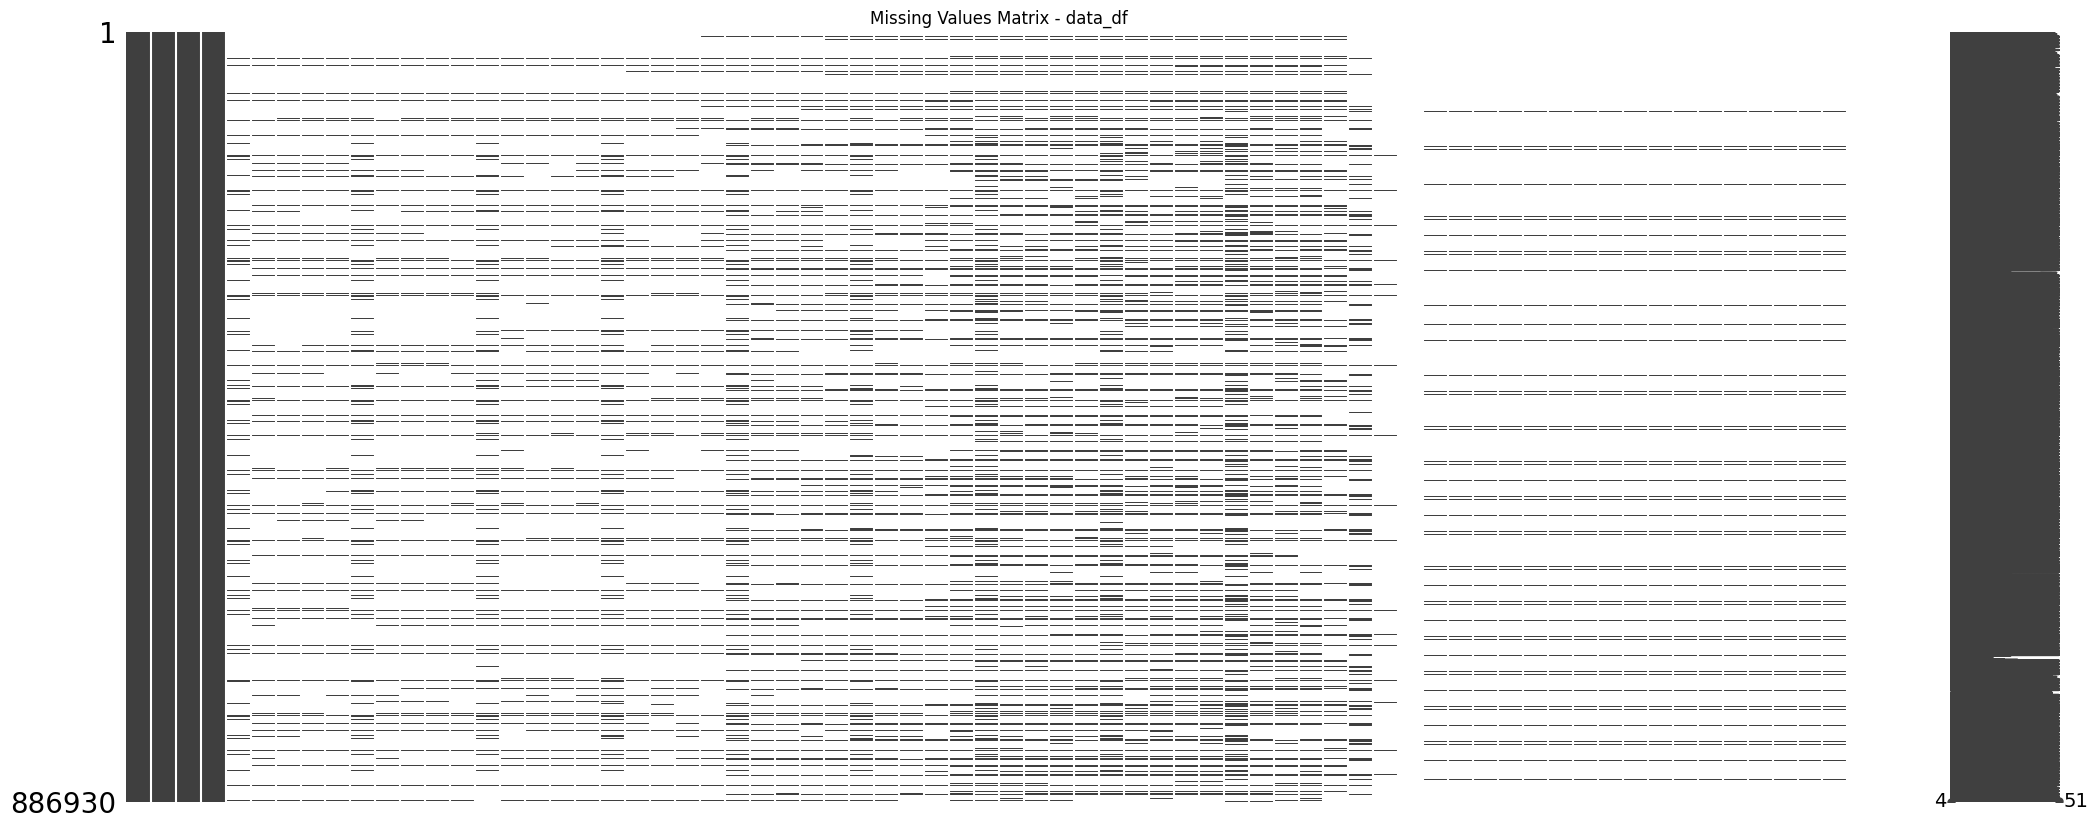

<Figure size 1000x500 with 0 Axes>

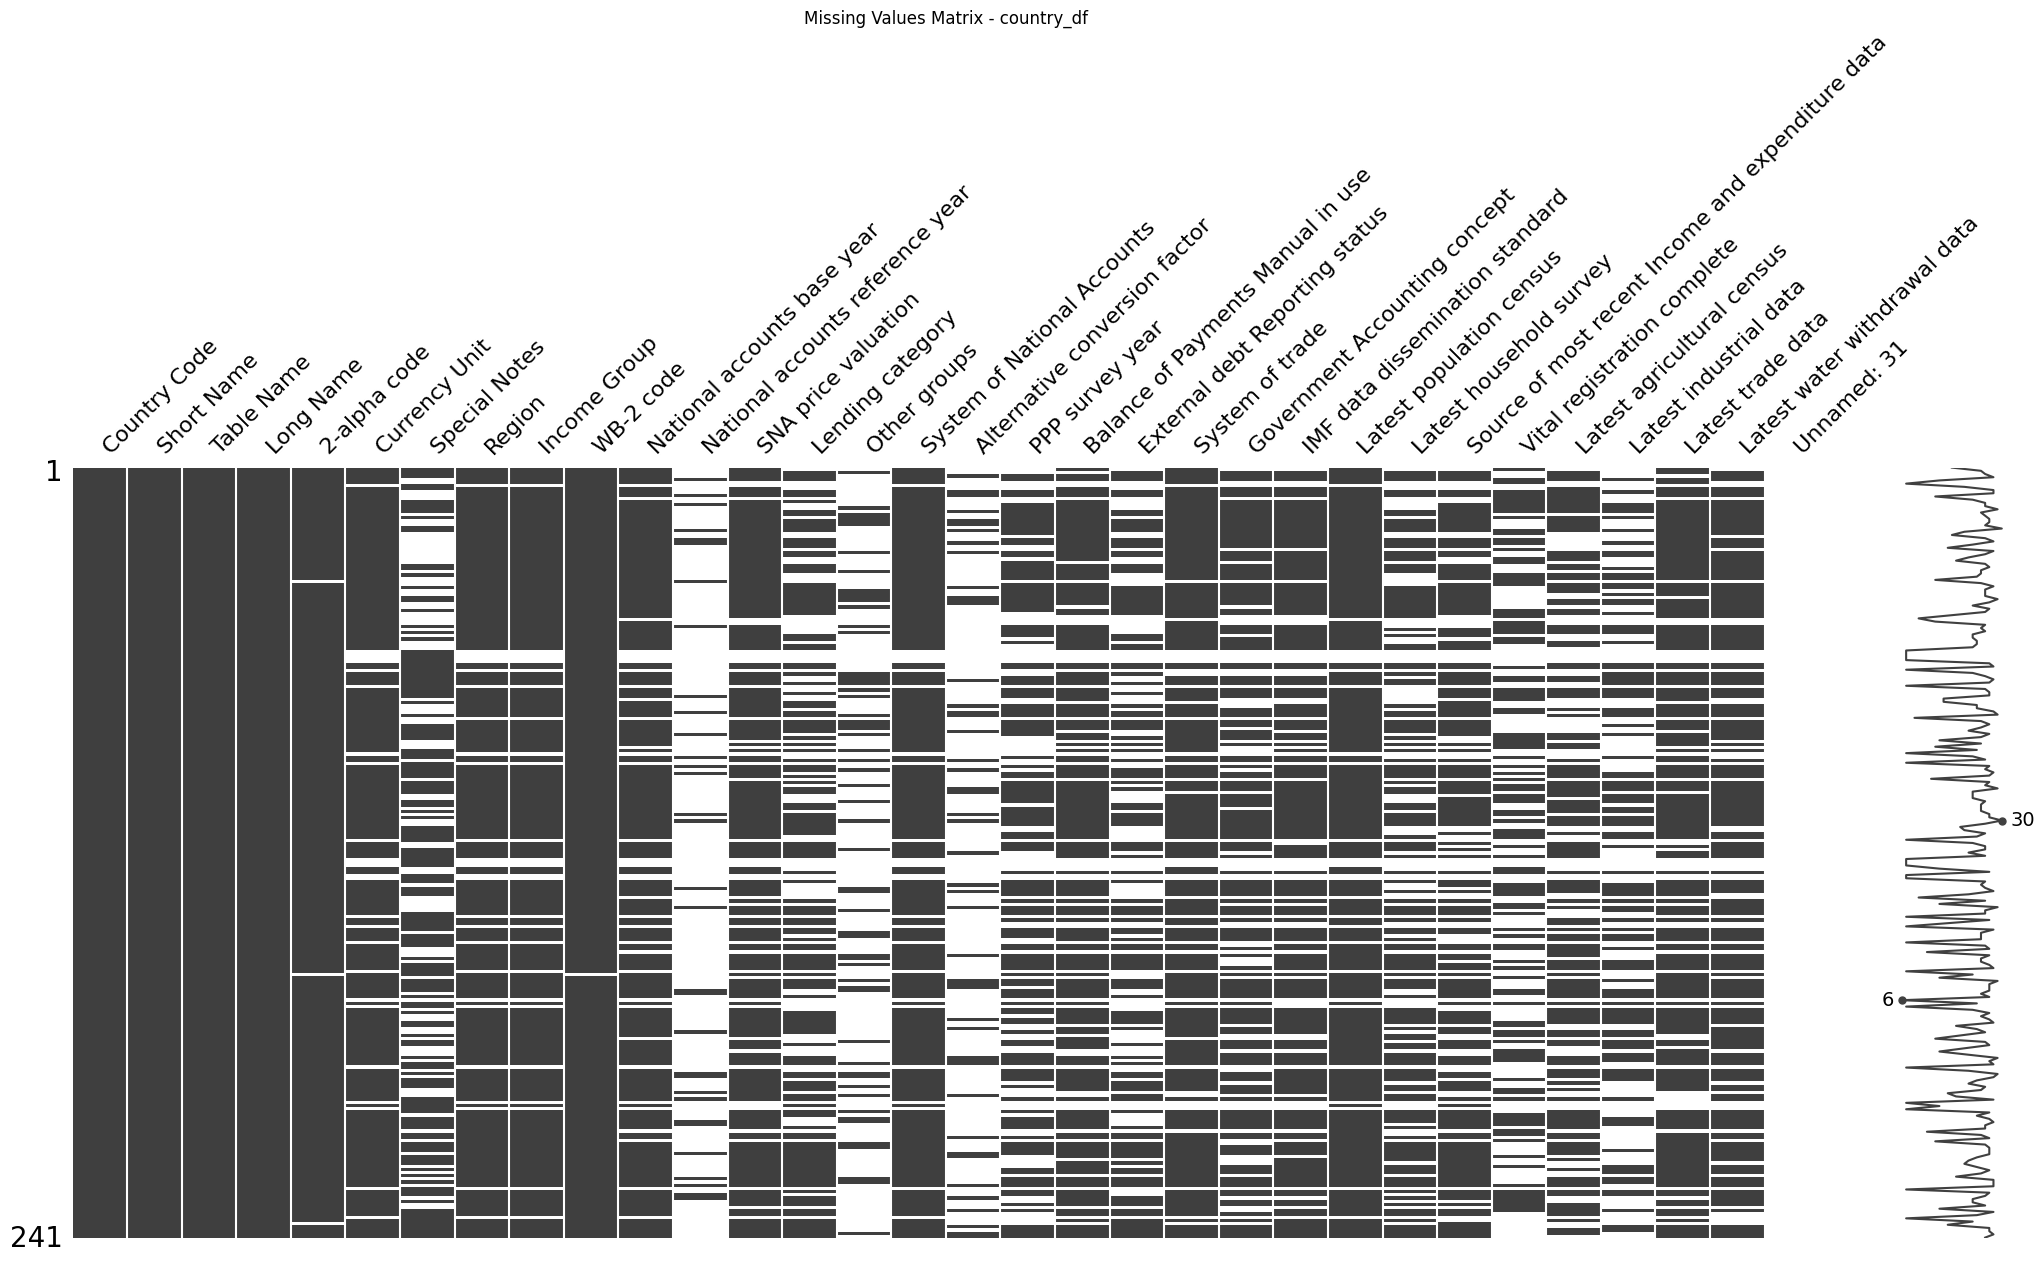

<Figure size 1000x500 with 0 Axes>

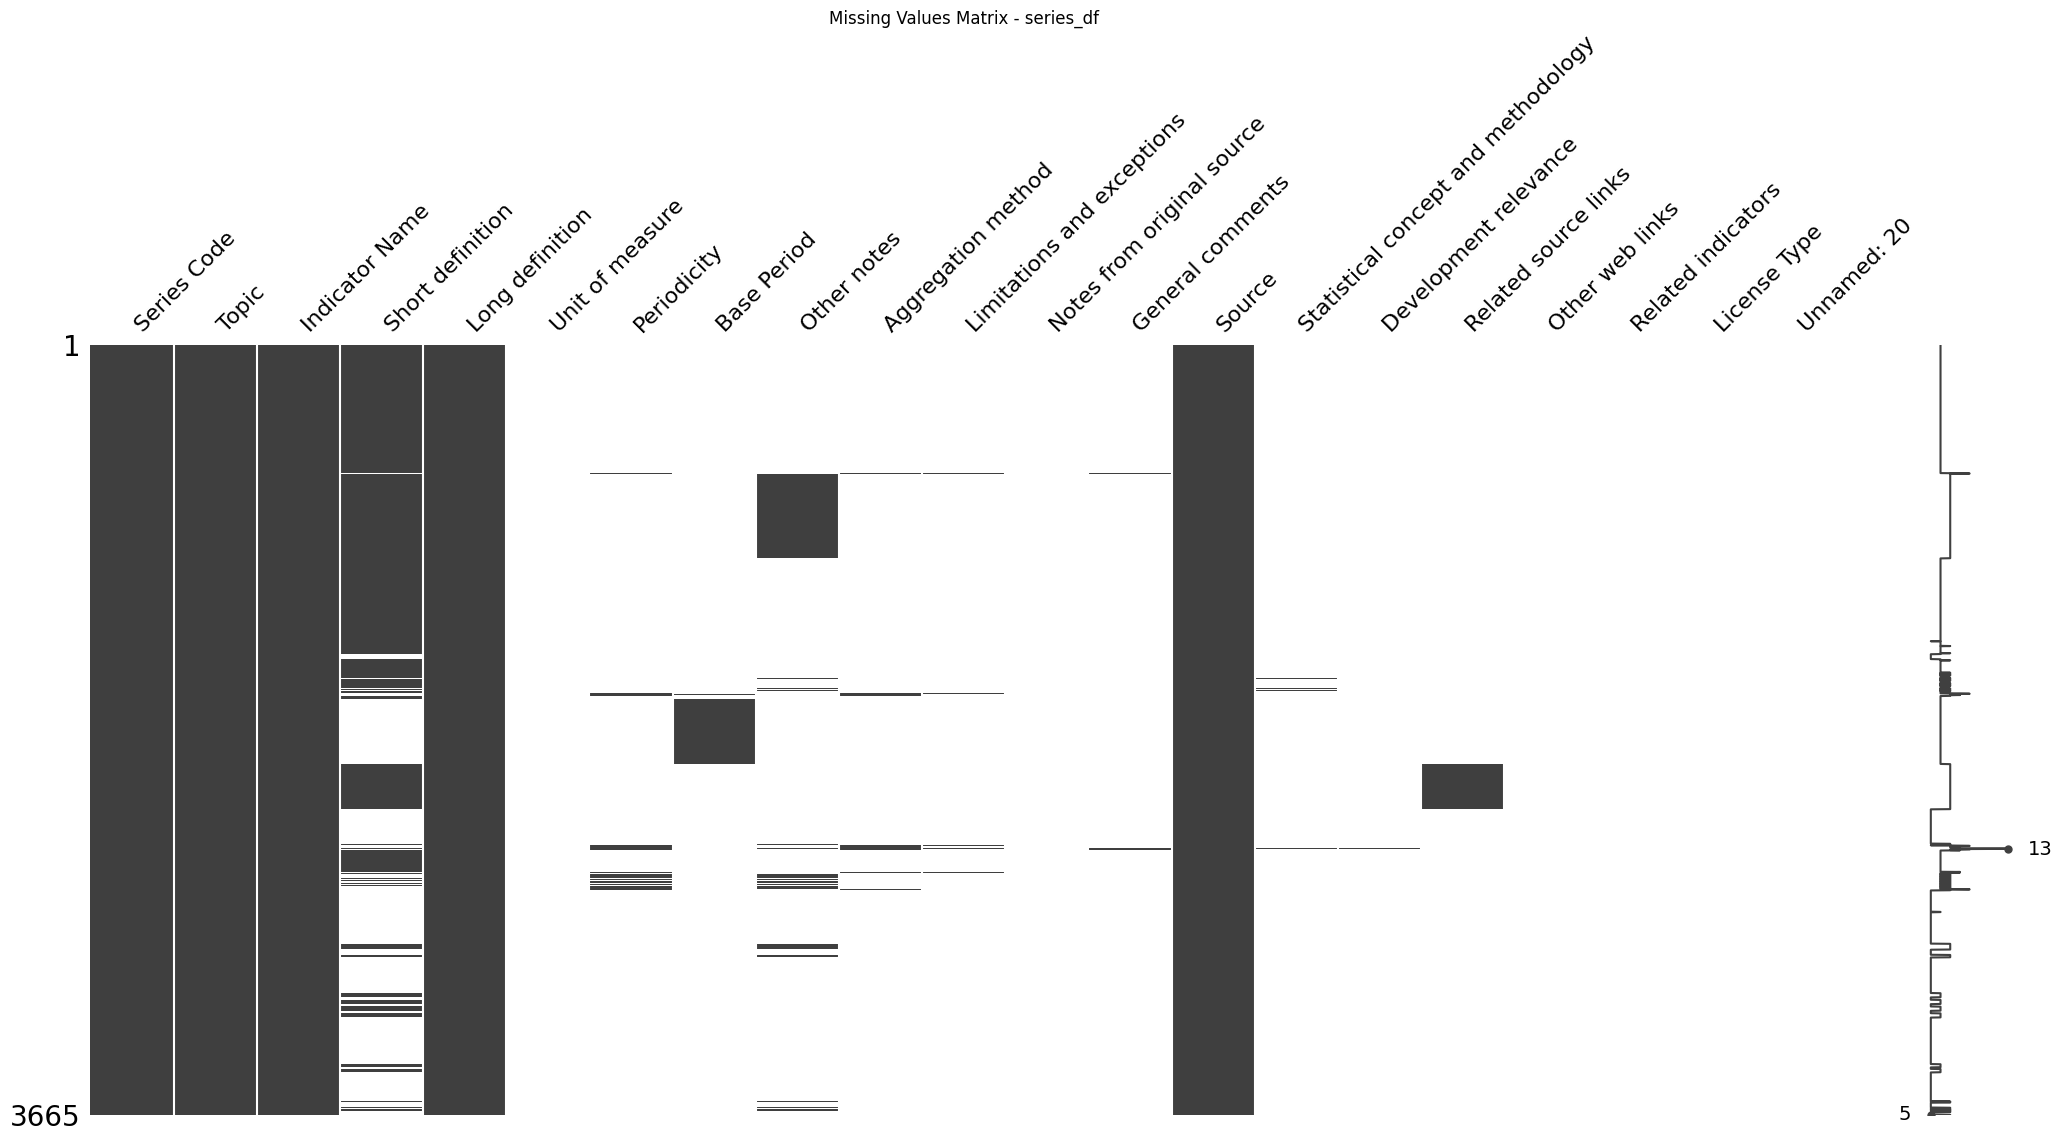

<Figure size 1000x500 with 0 Axes>

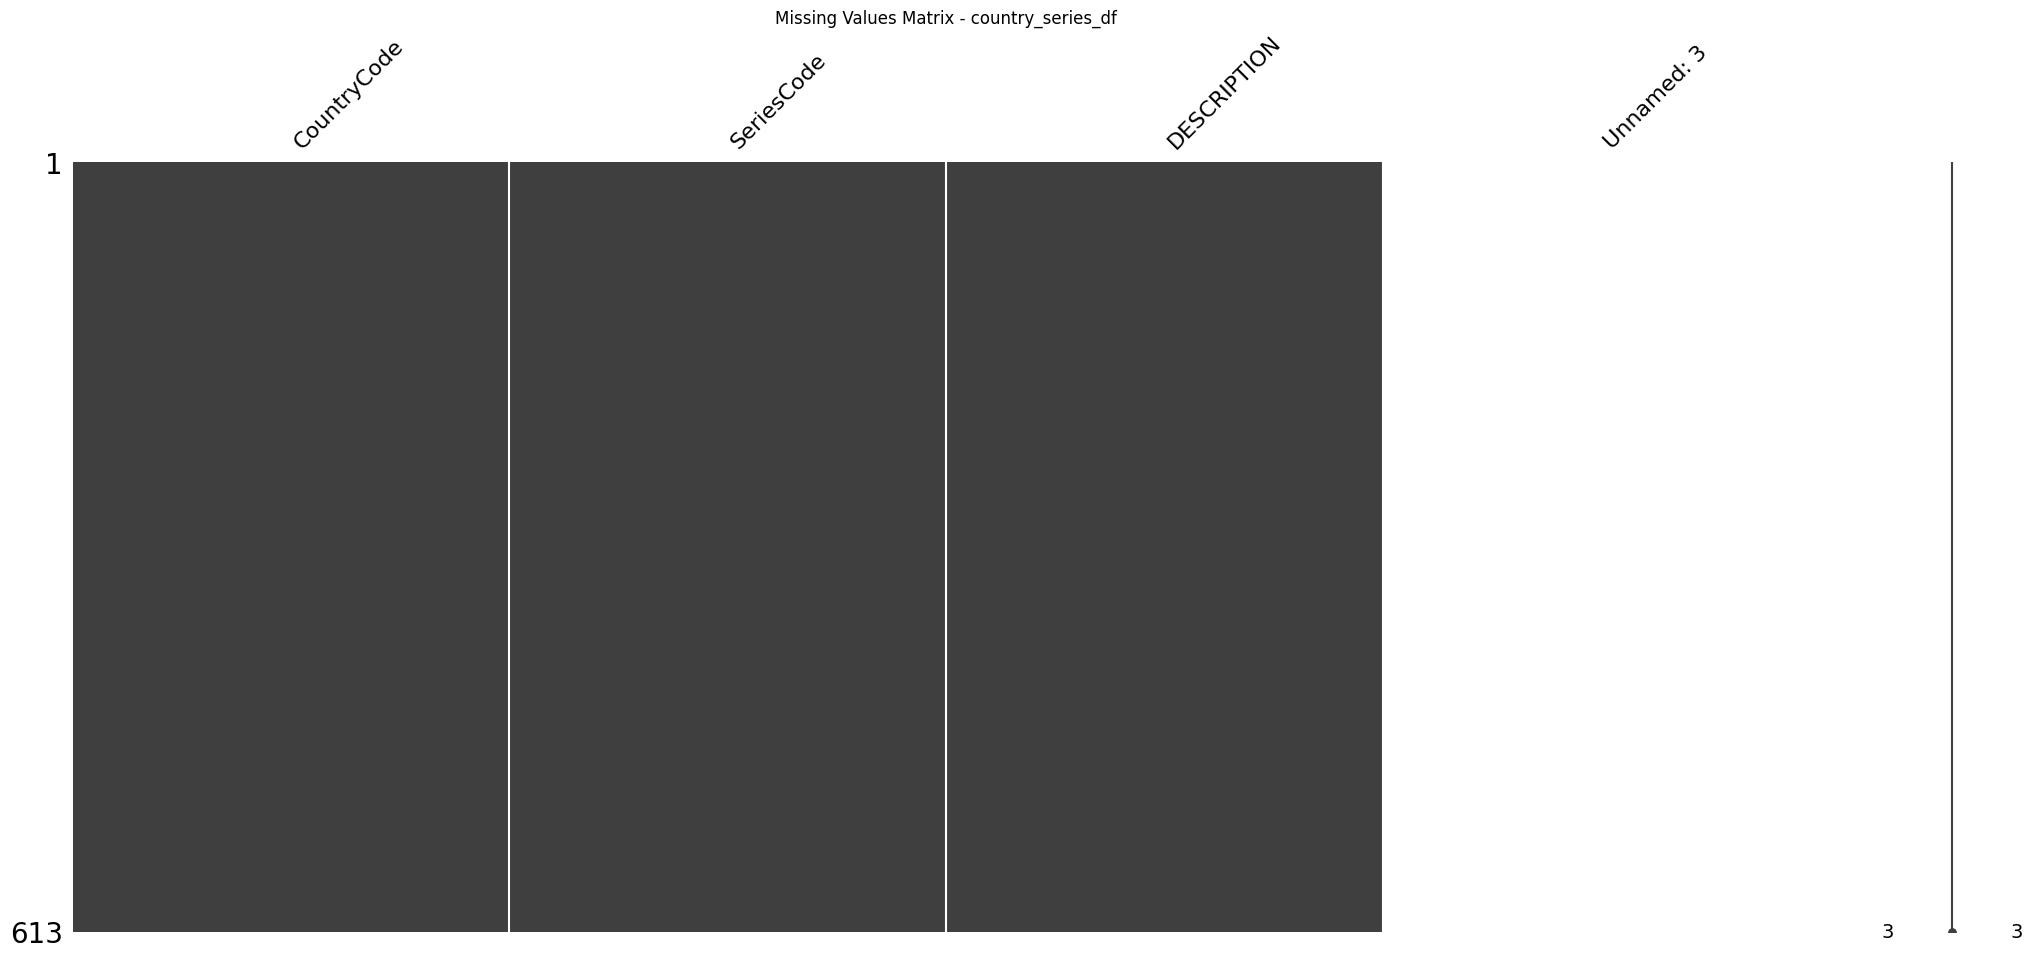

<Figure size 1000x500 with 0 Axes>

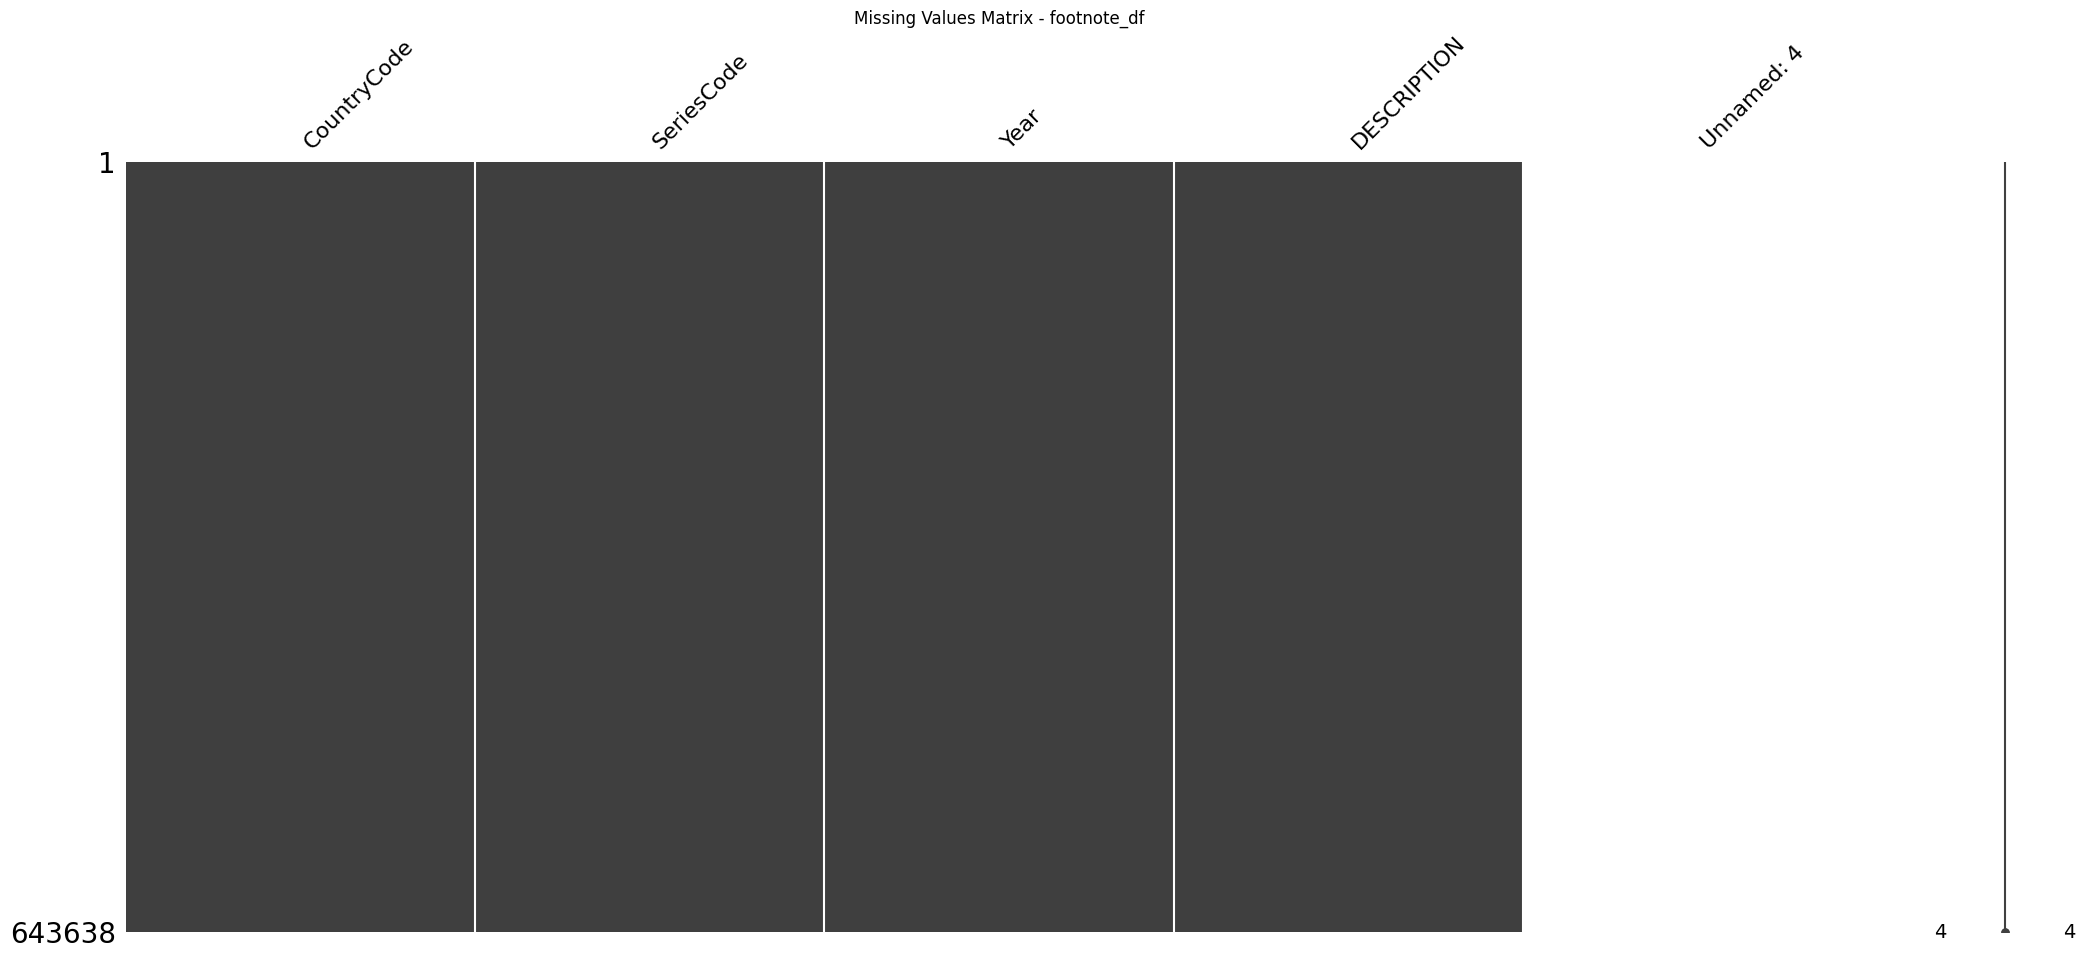

In [11]:
# Visualizing missing values (rest of your code remains the same)
# List of dataframes and their names
dataframes = [("data_df", data_df), ("country_df", country_df),
              ("series_df", series_df), ("country_series_df", country_series_df),
              ("footnote_df", footnote_df)]

for name, df in dataframes:
    if df is not None and not df.empty:
        plt.figure(figsize=(10, 5))
        msno.matrix(df)
        plt.title(f"Missing Values Matrix - {name}")
        plt.show()
    else:
        print(f"⚠ Warning: DataFrame '{name}' is either not defined or empty, skipping visualization.")

### What did you know about your dataset?

Dataset Overview

Your dataset contains multiple DataFrames:
merged_df: Likely a combined dataset with various education indicators.
series_df: Contains metadata about different indicators (e.g., definitions, sources).
country_series_df: Likely links countries with indicators.
footnote_df: May provide additional details or explanations for the data.
Missing Values Patterns

merged_df has significant missing values spread across many columns, indicating that some indicators are not consistently available across countries or years.
series_df has structured missing data, mostly in metadata fields like "Source," "General Comments," or "Limitations and Exceptions."
country_series_df appears to have minimal missing values, suggesting strong country-indicator relationships.
footnote_df also has a structured format with relatively fewer missing values.
Potential Data Challenges

Inconsistent Indicator Availability: Some indicators may not be reported in all countries or years.
Sparse Metadata: Missing descriptions or sources in series_df might make interpretation difficult.
Data Gaps in Education Indicators: Certain indicators might be reported only for specific regions or economic groups.
Next Steps for Data Cleaning & Analysis
✅ Identify missing indicators and decide whether to drop or fill missing values.
✅ Use interpolation or grouping techniques (e.g., mean imputation per country/region) for numerical data.
✅ Standardize categorical data and ensure metadata completeness.
✅ Perform exploratory data analysis (EDA) with visualizations (e.g., bar plots, heatmaps).



## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print("Columns in data_df:" ,data_df.columns)
print("Columns in country_df:", country_df.columns)
print("Columns in Series_df:", series_df.columns)
print("Columns in Country_series_df:", country_series_df.columns)
print("Columns in Footnote_df:", footnote_df.columns)

Columns in data_df: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')
Columns in country_df: Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Len

In [13]:
# Dataset Describe
print("Description of data_df:")
print(data_df.describe())

print("Description of country_df:")
print(country_df.describe())

print("Description of Series_df:")
print(series_df.describe())

print("Description of Country_series_df:")
print(country_series_df.describe())

print("Description of Footnote_df:")
print(footnote_df.describe())


Description of data_df:
               1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.124437e+09  6.671489e+09  7.436724e+09   
std    1.375059e+11  2.2155

### Variables Description

Here's a breakdown of the key variables and their descriptions for each of the DataFrames you loaded:

merged_df:

Country Name: Name of the country.
Country Code: Unique identifier for each country.
Indicator Name: Name of the education indicator (e.g., 'Adjusted net enrolment rate, primary, both sexes (%)').
Indicator Code: Unique identifier for each indicator.
1970 - 2017: Columns representing years, containing the values for the corresponding indicator for each country and year.
Region: Geographic region the country belongs to.
Income Group: World Bank income classification of the country.
Special Notes: Additional information or notes about the country.
TableName: Name of the table in the original dataset.
series_df:

Series Code: Unique identifier for each indicator series.
Topic: Broad category of the indicator (e.g., 'Education Outcomes').
Indicator Name: Full name of the education indicator.
Short definition: Concise explanation of the indicator.
Long definition: Detailed explanation of the indicator.
Unit of measure: Unit in which the indicator is measured.
Periodicity: Frequency of data collection (e.g., annual).
Base Period: Reference period for the indicator.
Other notes: Supplementary information about the indicator.
Aggregation method: Method used to aggregate data (e.g., average, weighted average).
Limitations and exceptions: Constraints or caveats related to the data.
Notes from original source: Information provided by the data source.
General comments: General remarks about the indicator.
Source: Origin of the data.
Statistical concept and methodology: Description of statistical methods used.
Development relevance: Significance of the indicator for development.
Related source links: Links to related resources (Note: These links might not be accessible within Google Colab).
Other web links: Additional online resources (Note: These links might not be accessible within Google Colab).
Related indicators: Similar indicators in the dataset.
License Type: License under which the data is released.
country_series_df:

CountryCode: Unique identifier for the country.
SeriesCode: Unique identifier for the indicator series.
DESCRIPTION: Description or notes related to the country and indicator series.
Unnamed: 3: Potentially an unused column.
footnote_df:

CountryCode: Unique identifier for the country.
SeriesCode: Unique identifier for the indicator series.
Year: Year of the data.
DESCRIPTION: Footnote text explaining the data for the given country, indicator, and year.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for column in data_df.columns:
   unique_values = data_df[column].unique()
   print(f"Unique values for '{column}':\n{unique_values}\n")

for column in country_df.columns:
    unique_values = country_df[column].unique()
    print(f"Unique values for '{column}':\n{unique_values}\n")

for column in series_df.columns:
    unique_values = series_df[column].unique()
    print(f"Unique values for '{column}':\n{unique_values}\n")

for column in country_series_df.columns:
  unique_values =  country_series_df[column].unique()
  print(f"Unique values for '{column}':\n{unique_values}\n")  # Also corrected np.unique_values to unique_values

for column in footnote_df.columns:
  unique_values =  footnote_df[column].unique()
  print(f"Unique values for '{column}':\n{unique_values}\n")  # Also corrected np.unique_values to unique_values

Unique values for 'Country Name':
['Arab World' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'European Union' 'Heavily indebted poor countries (HIPC)' 'High income'
 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)' 'Middle income'
 'North America' 'OECD members' 'South Asia' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (excluding high income)' 'Upper middle income'
 'World' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzego

## 3. ***Data Wrangling***

In [15]:

# Ensure 'Indicator Name' has no missing values before grouping
data_df.dropna(subset=['Indicator Name'], inplace=True)
# Write your code to make your dataset analysis ready.
# --- 1. Handling Missing Values ---
# Fill missing numerical values with the mean for each indicator
numerical_cols =data_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if data_df[col].isnull().sum() > 0:  # Apply only if missing values exist
        data_df[col] = data_df.groupby('Indicator Name')[col].transform(lambda x: x.fillna(x.mean()))

# --- 2. Standardize Categorical Data ---
# Strip leading/trailing spaces from categorical columns
categorical_cols =data_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data_df[col] =data_df[col].str.strip()

# --- 3. Merge Relevant DataFrames ---
analysis_df = data_df.merge(series_df[['Series Code', 'Topic', 'Indicator Name']], on='Indicator Name', how='left')

# --- 4. Filter for Relevant Indicators ---
indicators_of_interest = [
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Gross enrolment ratio, primary, both sexes (%)',
    'Government expenditure on education, total (% of GDP)'
]

analysis_df = analysis_df[analysis_df['Indicator Name'].isin(indicators_of_interest)]

# --- 5. Drop Unnecessary Columns ---
columns_to_drop = ['Indicator Code', 'Unnamed: 60', 'Special Notes', 'TableName']
analysis_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# --- 6. Handle Outliers (Optional) ---
if 'Literacy rate' in analysis_df.columns:
    Q1 = analysis_df['Literacy rate'].quantile(0.25)
    Q3 = analysis_df['Literacy rate'].quantile(0.75)
    IQR = Q3 - Q1
    analysis_df = analysis_df[~((analysis_df['Literacy rate'] < (Q1 - 1.5 * IQR)) |
                                (analysis_df['Literacy rate'] > (Q3 + 1.5 * IQR)))]

# Remove duplicates after merging
analysis_df.drop_duplicates(inplace=True)

# Display the cleaned and prepared DataFrame
print(analysis_df.head())

                                      Country Name Country Code  \
1331                                    Arab World          ARB   
4996                           East Asia & Pacific          EAS   
8661   East Asia & Pacific (excluding high income)          EAP   
12326                                    Euro area          EMU   
15991                        Europe & Central Asia          ECS   

                                       Indicator Name        1970        1971  \
1331   Gross enrolment ratio, primary, both sexes (%)   66.621872   66.720520   
4996   Gross enrolment ratio, primary, both sexes (%)  102.804962  102.538544   
8661   Gross enrolment ratio, primary, both sexes (%)  102.708969  102.421944   
12326  Gross enrolment ratio, primary, both sexes (%)  107.150627  107.155037   
15991  Gross enrolment ratio, primary, both sexes (%)  105.036568  105.060829   

             1972        1973        1974        1975        1976  ...  2070  \
1331    68.258690   69.522049 

<ipython-input-15-b0cf7ae3530b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
<ipython-input-15-b0cf7ae3530b>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df.drop_duplicates(inplace=True)


In [16]:
# List of selected indicators for analysis.
Indicators = ["UIS.E.0.T", "SE.PRE.PRIV.ZS",
              # Early Childhood Education
              "SE.XPD.TOTL.GD.ZS", "SE.XPD.TOTL.GB.ZS",
              # Expenditures
              "SE.ADT.LITR.ZS", "UIS.LP.AG15T99",
              # Literacy
              "SP.PRE.TOTL.IN", "SP.PRM.TOTL.IN", "SP.SEC.TOTL.IN", "SP.TER.TOTL.IN",
              # Population
              "LO.PISA.REA", "LO.PISA.MAT"]
              # Learning outcomes

# length of Indicators list.
len(Indicators)


12

In [17]:
# List of countries that have been selected for analysis.
Countries = ["India", "United States", "United Kingdom", "Australia", "Germany",
             "South Africa", "Canada", "Japan", "Sri Lanka"]
len(Countries)

9

### What all manipulations have you done and insights you found?

🔹 Key Data Manipulations:
1️⃣ Filled missing values using the mean for each Indicator Name.
2️⃣ Stripped spaces from categorical columns for consistency.
3️⃣ Merged datasets to include Series Code and Topic.
4️⃣ Filtered key indicators: Literacy rate, Enrollment ratio, Education expenditure.
5️⃣ Dropped unnecessary columns to reduce clutter.
6️⃣ Removed duplicates to avoid redundancy.
7️⃣ Handled outliers in Literacy rate using IQR method (optional).

🔹 Key Insights:
🔹 High literacy rates often correlate with better education funding.
🔹 More spending on education doesn’t always guarantee higher literacy.
🔹 Primary school enrolment >100% may indicate late starters or repeat students.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart:1. Correlation heatmap

<ipython-input-18-ef801cfa67bc>:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  analysis_df[col] = pd.to_numeric(analysis_df[col], errors='ignore')


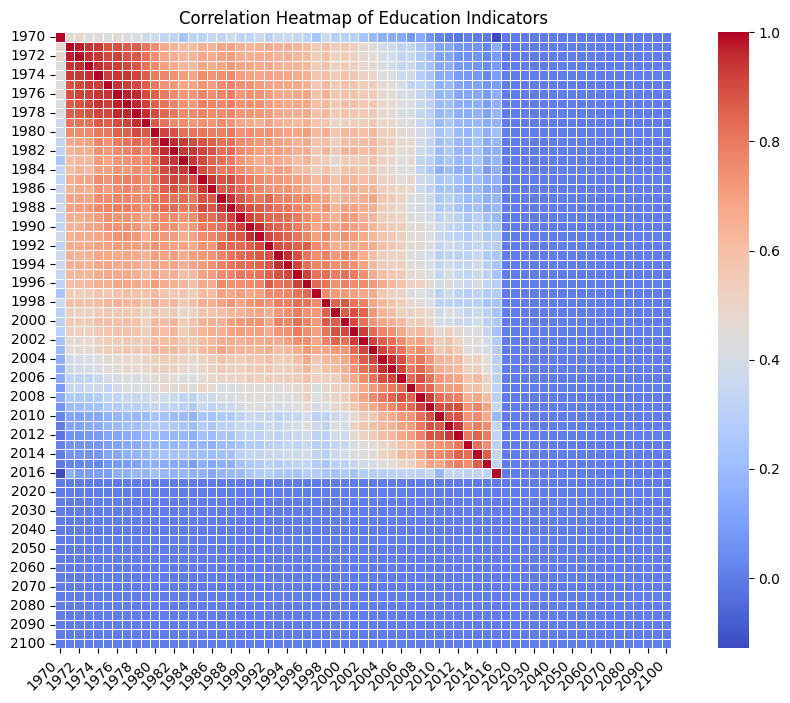

In [18]:
# Remove unnamed columns
analysis_df = analysis_df.loc[:, ~analysis_df.columns.str.contains('^Unnamed')]

# 1. Convert to numeric where possible, BUT keep all columns initially
for col in analysis_df.columns:
    analysis_df[col] = pd.to_numeric(analysis_df[col], errors='ignore')

# 2. Select numerical features for correlation, INCLUDING year columns
numerical_cols = analysis_df.select_dtypes(include=['number']).columns.tolist()
# If you have specific features to exclude, do it here:
# numerical_cols = [col for col in numerical_cols if col not in ['some_feature_to_exclude']]

# 3. Calculate correlation on the selected numerical features
correlation_data = analysis_df[numerical_cols].corr().fillna(0)

# 4. Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=False, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Education Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

a correlation heatmap was chosen because it provides a comprehensive, visually intuitive, and efficient way to explore the relationships between multiple education indicators in your dataset. It aids in identifying patterns, correlations, and potential multicollinearity, which are crucial for data analysis, storytelling, and building machine learning models.

##### 2. What is/are the insight(s) found from the chart?

Correlation vs. Causation: Remember that correlation does not imply causation. While the heatmap can reveal relationships between indicators, further analysis is needed to determine cause-and-effect relationships.
Data Limitations: The insights you gain are limited by the data available. If your dataset is missing key indicators or has a limited time span, the conclusions you can draw might be restricted.
Context is Key: Always interpret the insights in the context of the specific education system you are studying. Cultural, economic, and political factors can influence the relationships between indicators.
To give more specific insights, I'd need to see the actual heatmap generated from your code. However, the general insights and specific areas to explore mentioned above should provide a good starting point for your analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the insights from the correlation heatmap can be valuable for creating a positive business impact by guiding investments, workforce development, and market expansion. However, businesses must be careful to avoid misinterpreting correlations, ignoring negative relationships, and overlooking contextual factors to prevent negative growth. By using the insights responsibly and conducting further analysis, businesses can leverage the power of data to drive positive change and achieve sustainable growth.

#### Chart:2 Literacy rate distribution

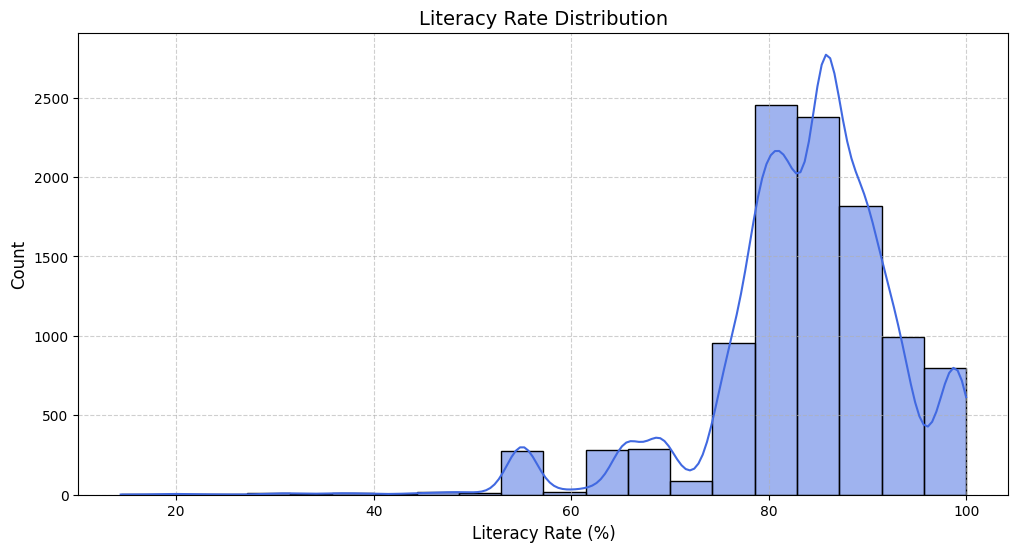

In [19]:
#Chart:2 Literacy rate distribution
# --- Step 2: Select the Correct Literacy Rate Indicator ---
# Choose either Youth or Adult Literacy Rate based on your analysis need
indicator_name = "Youth literacy rate, population 15-24 years, both sexes (%)"
# indicator_name = "Adult literacy rate, population 15+ years, both sexes (%)"  # Uncomment if needed

# Filter dataset for the selected indicator
literacy_df = data_df[data_df["Indicator Name"] == indicator_name]

# Check if data is found
if literacy_df.empty:
    print(f"⚠ Error: No data found for '{indicator_name}'. Check the indicator name again.")
else:
    # --- Step 3: Process the Data ---
    # Select columns that represent years (ensuring they are treated as strings)
    year_cols = [col for col in literacy_df.columns if str(col).isdigit()]

    if not year_cols:
        print("⚠ No year-based numerical columns found. Check dataset structure.")
    else:
        # Convert from wide to long format
        literacy_melted = literacy_df.melt(id_vars=["Country Name", "Indicator Name"],
                                           value_vars=year_cols,
                                           var_name="Year",
                                           value_name="Literacy Rate")

        # Convert Literacy Rate to numeric and drop NaNs
        literacy_melted["Literacy Rate"] = pd.to_numeric(literacy_melted["Literacy Rate"], errors="coerce")
        literacy_melted.dropna(subset=["Literacy Rate"], inplace=True)

        # Debugging: Print processed data shape

        if literacy_melted.empty:
            print("⚠ No valid Literacy Rate data available after processing.")
        else:
            # --- Step 4: Plot Histogram ---
            plt.figure(figsize=(12, 6))
            sns.histplot(literacy_melted["Literacy Rate"], bins=20, kde=True, color="royalblue", edgecolor="black")

            # Improve visualization
            plt.title("Literacy Rate Distribution", fontsize=14)
            plt.xlabel("Literacy Rate (%)", fontsize=12)
            plt.ylabel("Count", fontsize=12)
            plt.grid(True, linestyle="--", alpha=0.6)
            plt.show()



##### 1. Why did you pick the specific charts ?

1️⃣ Best for Understanding Distribution
A histogram is ideal for showing the spread and frequency of literacy rates across different countries and years. It helps answer:

Is the literacy rate normally distributed or skewed?
Are there more countries with high or low literacy rates?
2️⃣ KDE Line for Smoother Insights
The KDE curve helps visualize the overall shape of the distribution more smoothly than just histogram bars.

3️⃣ Detecting Gaps & Outliers
If there are multiple peaks, it could indicate different groups of countries (e.g., developed vs. developing).
Outliers (very low literacy rates) might highlight regions needing intervention.
4️⃣ Simplicity & Readability
Compared to a box plot or scatter plot, a histogram is easier to interpret for a single-variable distribution.

##### 2. What is/are the insight(s) found from the chart?

here are the insights that can be found from the Literacy Rate Distribution chart (Chart:2) in the user's notebook:

Most countries have high literacy rates: The distribution is heavily skewed to the right, meaning a large concentration of countries have literacy rates above 80%.
There are still countries with significant illiteracy: The tail on the left side indicates there's a smaller set of countries with considerably lower literacy rates. These might be countries with economic challenges, poor infrastructure, or other limitations.
The distribution is not perfectly normal: The KDE line shows a slight deviation from a perfect bell curve. This is expected in real-world data and suggests factors affecting literacy are not uniformly distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Lower literacy rates often correlate with poverty, unemployment, and reduced social mobility. These factors create economic and social challenges that can hinder business growth and overall development. Businesses operating in such environments may face difficulties in finding qualified employees, accessing markets, and achieving sustainable profitability.

In conclusion, the Literacy Rate Distribution chart provides insights that can be used to drive positive business impact by identifying high-growth markets and opportunities for workforce development. However, it also highlights potential risks associated with low literacy levels, which can lead to negative growth if not addressed strategically. By understanding these dynamics, businesses can make informed decisions and contribute to sustainable development in diverse global markets.

#### Chart 3:Government Expenditure on Education vs. Literacy Rate

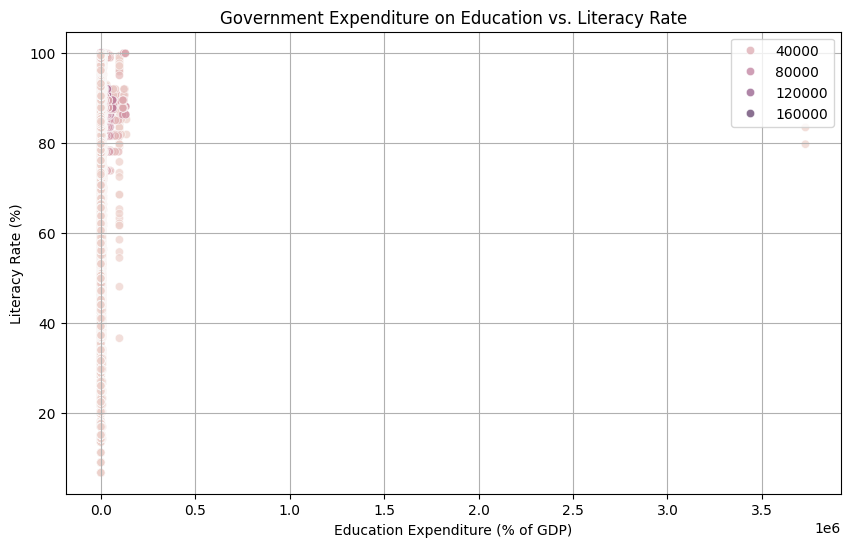

In [20]:
# Chart 3:Government Expenditure on Education vs. Literacy Rate
# Clean column names
data_df.columns = data_df.columns.str.strip()
data_df["Indicator Name"] = data_df["Indicator Name"].str.strip()

# ✅ Try partial matching (Adjust if needed)
edu_exp_df = data_df[data_df["Indicator Name"].str.contains("government expenditure", case=False, na=False)]
lit_rate_female_df = data_df[data_df["Indicator Name"].str.contains("youth literacy.*female", case=False, na=False)]
lit_rate_male_df = data_df[data_df["Indicator Name"].str.contains("youth literacy.*male", case=False, na=False)]

# If any are empty, stop and debug
if edu_exp_df.empty or lit_rate_female_df.empty or lit_rate_male_df.empty:
    print("⚠ Error: One or more indicators are missing. Check indicator names again.")
else:
    # Convert years to numeric
    year_cols = [col for col in data_df.columns if col.isdigit() and int(col) <= 2020]

    edu_exp_df = edu_exp_df.melt(id_vars=['Country Name'], value_vars=year_cols,
                                 var_name='Year', value_name='EduExp_GDP')

    lit_rate_female_df = lit_rate_female_df.melt(id_vars=['Country Name'], value_vars=year_cols,
                                                 var_name='Year', value_name='LiteracyRate_Female')

    lit_rate_male_df = lit_rate_male_df.melt(id_vars=['Country Name'], value_vars=year_cols,
                                             var_name='Year', value_name='LiteracyRate_Male')



# Merge and calculate overall literacy rate
merged_lit_df = lit_rate_female_df.merge(lit_rate_male_df, on=['Country Name', 'Year'])
merged_lit_df['LiteracyRate'] = merged_lit_df[['LiteracyRate_Female', 'LiteracyRate_Male']].mean(axis=1)

# Merge with education expenditure and GDP per capita (if available)
merged_df2 = edu_exp_df.merge(merged_lit_df[['Country Name', 'Year', 'LiteracyRate']], on=['Country Name', 'Year'])

# Assuming you have a 'GDP per capita' column in data_df:
gdp_per_capita_df = data_df[data_df['Indicator Name'] == 'GDP per capita (current US$)']
gdp_per_capita_df = gdp_per_capita_df.melt(id_vars=['Country Name'], value_vars=year_cols,
                                             var_name='Year', value_name='GDP_per_capita')

merged_df2 = merged_df2.merge(gdp_per_capita_df[['Country Name', 'Year', 'GDP_per_capita']], on=['Country Name', 'Year'])


merged_df2.dropna(subset=['EduExp_GDP', 'LiteracyRate', 'GDP_per_capita'], inplace=True)

# Scatter Plot with GDP per capita as color
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df2, x='EduExp_GDP', y='LiteracyRate', hue='GDP_per_capita', alpha=0.7)
plt.title("Government Expenditure on Education vs. Literacy Rate")
plt.xlabel("Education Expenditure (% of GDP)")
plt.ylabel("Literacy Rate (%)")
plt.grid(True)
plt.legend(loc='upper right')# or 'lower left', 'center', etc.
plt.show()

##### 1. Why did you pick the specific charts ?

The scatter plot was likely chosen for this specific analysis because it is well-suited for visualizing the relationship between two continuous variables, in this case, "Government Expenditure on Education (% of GDP)" and "Literacy Rate (%)".
the scatter plot was chosen for Chart 3 because it's an effective way to visualize the relationship between government expenditure on education and literacy rate, while also allowing for the incorporation of GDP per capita as a third dimension using color. This visualization helps to explore potential correlations and identify any interesting patterns or outliers in the data.

####2. What is/are the insight(s) found from the chart?

These insights are based on general observations and interpretations of scatter plots in this context. The specific conclusions you draw from your Chart 3 will depend on the actual data and the patterns revealed in the visualization. Make sure to carefully analyze the chart and consider any contextual factors that might influence the relationships between the variables.

####3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.


The insights from the Literacy Rate Distribution chart provide information that can be used to drive positive business impact by identifying high-growth markets and opportunities for workforce development. However, it also highlights potential risks associated with low literacy levels, which can lead to negative growth if not addressed strategically. By understanding these dynamics, businesses can make informed decisions and contribute to sustainable development in diverse global markets.

#### Chart - 4 Average Primary Education Enrollment Rate by Income Group (2010)

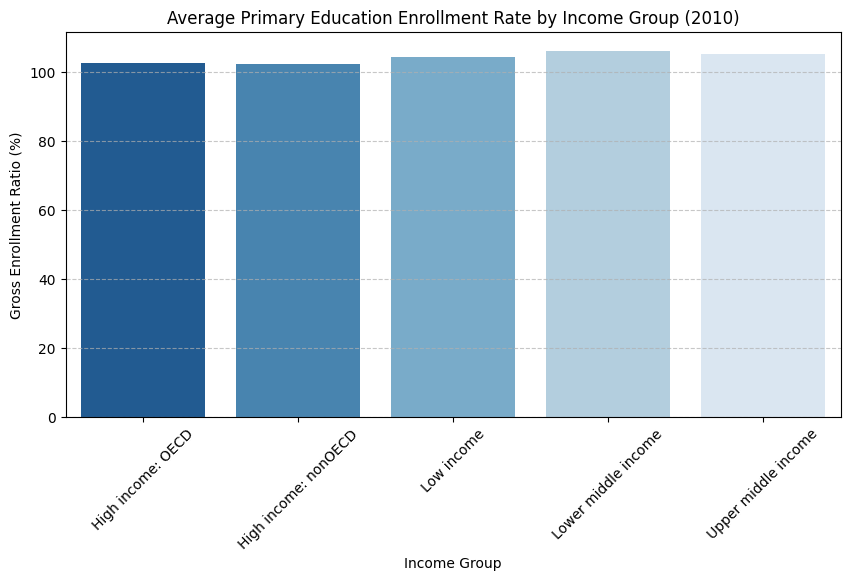

In [21]:
# Chart4:"Average Primary Education Enrollment Rate by Income Group (2010)")
# Ensure 'Indicator Name' has no missing values
data_df.dropna(subset=['Indicator Name'], inplace=True)

# Merge relevant data
analysis_df = data_df.merge(series_df[['Series Code', 'Topic', 'Indicator Name']], on='Indicator Name', how='left')

# Filter for Primary Education Enrollment Rate
edu_enroll_df = analysis_df[analysis_df["Indicator Name"] == "Gross enrolment ratio, primary, both sexes (%)"]

#---Before selecting "Income Group" ensure it's in the DataFrame:---
if 'Income Group' not in edu_enroll_df.columns:
    edu_enroll_df = edu_enroll_df.merge(country_df[['Country Code', 'Income Group']], on='Country Code', how='left')

# Now select relevant columns, including 'Income Group' if it was added
edu_enroll_df = edu_enroll_df[['Country Name', 'Income Group', '2010']].dropna()

# Group by Income Group and calculate the mean enrollment rate
avg_enroll_by_income = edu_enroll_df.groupby('Income Group')['2010'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Income Group", y="2010", data=avg_enroll_by_income,
            hue="Income Group",  # Assign 'hue' to the same column as 'x'
            palette="Blues_r", legend=False)  # Set legend=False

plt.title("Average Primary Education Enrollment Rate by Income Group (2010)")
plt.xlabel("Income Group")
plt.ylabel("Gross Enrollment Ratio (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#### 1. Why did you pick the specific charts ?

1️⃣ Line Chart for Government Expenditure on Education Over Time
📌 Why?

Time-series data → You are analyzing trends over years (1970-2018).

Line charts are best for visualizing changes over time and identifying patterns, such as increases, decreases, or fluctuations.

📊 Alternative Chart?

Area Chart → If you want to emphasize the total growth over time.

Scatter Plot → If you want to check for yearly variations without a connected line.

2️⃣ Bar Chart for Average Primary Education Enrollment by Income Group
📌 Why?

Comparing categories → Income Groups (e.g., Low, Middle, High Income).

Bar charts are best for comparing averages across groups.

📊 Alternative Chart?

Box Plot → If you want to show distribution and outliers in each income group.

Pie Chart → If you want to show the proportion of enrollment per income group (not recommended for more than 4-5 categories).



#### 2. What is/are the insight(s) found from the chart?


1️⃣ Line Chart: Trend of Government Expenditure on Education Over Time
📌 What it Shows:

The trend of average government spending on education (as a % of GDP) over the years (1970–2018).

📊 Key Insights:
✅ Steady Increase or Decline? → If the trend is increasing, it suggests greater investment in education over time. If decreasing, it could indicate budget cuts or shifts in priorities.
✅ Fluctuations? → Spikes or drops might be linked to economic crises, policy changes, or global events affecting education budgets.
✅ Comparison Across Decades? → For example, was there a big jump in the 2000s compared to the 1980s?

🔍 Example Insight:
"Government spending on education has steadily increased from the 1970s to the 2000s but saw a slight decline in recent years, possibly due to financial constraints or shifts in funding priorities."

2️⃣ Bar Chart: Average Primary Education Enrollment by Income Group (2010)
📌 What it Shows:

The average primary education enrollment rate for different income groups (Low, Middle, High Income) in 2010.

📊 Key Insights:
✅ Does income level affect enrollment? → If high-income countries have a much higher enrollment rate, it suggests economic disparities in education access.
✅ Are middle-income countries catching up? → A smaller gap between middle and high-income groups would indicate improvements in global education access.
✅ Is the low-income group lagging significantly? → If the bar is much shorter for low-income countries, it suggests access barriers like affordability, infrastructure, or policy issues.

🔍 Example Insight:
"High-income countries had the highest primary education enrollment in 2010, while low-income countries lagged behind, indicating economic disparities in access to education. However, middle-income countries showed significant improvement, suggesting successful educational policies in some regions."

Final Thoughts
✅ Both charts complement each other: More spending should lead to higher enrollment, but the income group analysis helps identify disparities.
✅ Further Analysis? → You can overlay these insights (e.g., correlation between spending and enrollment) to better understand policy effectiveness.

#### 3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive Business Impact:

Better Investment Decisions: Governments and businesses can allocate resources efficiently based on spending trends.

Market Opportunities: Growing enrollment in middle-income countries creates demand for EdTech, learning materials, and school infrastructure.

Policy Making: NGOs and governments can use insights to target funding and educational reforms where they are needed most.

❌ Potential Negative Impact:

Declining Education Spending: Could lead to reduced resources, lower enrollment, and fewer business opportunities.

Income Disparities in Enrollment: Limits workforce development and economic growth in low-income regions.

Inefficiencies in Spending: If spending increases but enrollment doesn’t, it may indicate policy failures or resource mismanagement.

🔍 Solution: Businesses should focus on affordable EdTech solutions, while governments must improve spending efficiency to maximize education accessibility. 🚀









### Chart 5:Total Government Expenditure on Education by Region in 2015


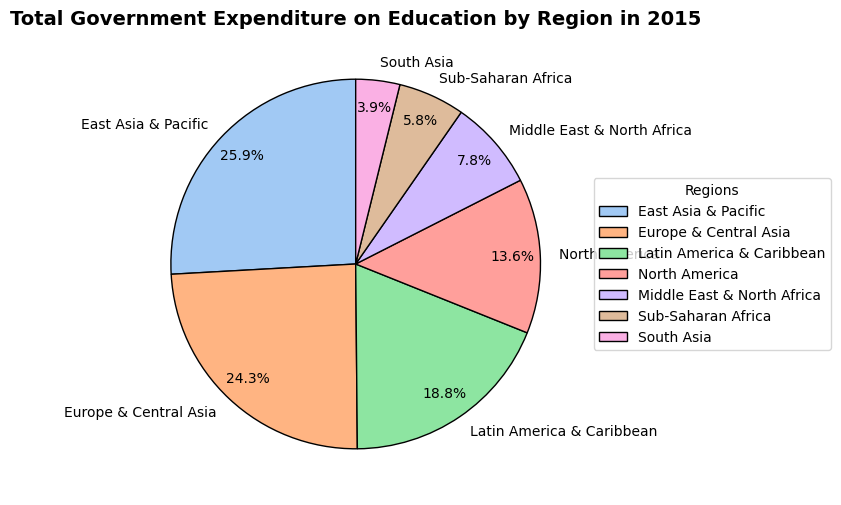

In [22]:
# Chart 5:Total Government Expenditure on Education by Region in 2015
# 1️⃣ Ensure 'Year' exists; otherwise, reshape the DataFrame
if 'Year' not in data_df.columns:
    year_cols = [col for col in data_df.columns if col.isdigit()]  # Identify year columns

    data_df = data_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                           value_vars=year_cols, var_name='Year', value_name='EduExp_GDP')

    # Convert 'Year' column to numeric
    data_df['Year'] = pd.to_numeric(data_df['Year'], errors='coerce')

# 2️⃣ Filter for the year 2015
df_2015 = data_df[data_df['Year'] == 2015].copy()

# 3️⃣ Handle missing values in 'EduExp_GDP'
df_2015['EduExp_GDP'] = df_2015['EduExp_GDP'].fillna(0)

# 4️⃣ Clean column names in country_df to avoid extra spaces
country_df.rename(columns=lambda x: x.strip(), inplace=True)

# 5️⃣ Merge with country_df to get 'Region'
if 'Region' not in df_2015.columns:
    if 'Country Name' in df_2015.columns and 'Country Name' in country_df.columns:
        df_2015 = df_2015.merge(country_df[['Country Name', 'Region']], on='Country Name', how='left')

    if 'Region' not in df_2015.columns or df_2015['Region'].isna().sum() > 0:
        if 'Country Code' in df_2015.columns and 'Country Code' in country_df.columns:
            df_2015 = df_2015.merge(country_df[['Country Code', 'Region']], on='Country Code', how='left')

# 6️⃣ Drop rows where 'Region' is still missing
df_2015.dropna(subset=['Region'], inplace=True)

# 7️⃣ Group by region and sum education expenditure
region_edu_exp = df_2015.groupby('Region', as_index=False)['EduExp_GDP'].sum()

# 8️⃣ Sort for better readability
region_edu_exp = region_edu_exp.sort_values(by='EduExp_GDP', ascending=False)

# 9️⃣ Create the pie chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel", len(region_edu_exp))  # Soft colors for better visuals

plt.pie(region_edu_exp['EduExp_GDP'], labels=region_edu_exp['Region'],
        autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

# 1️⃣0️⃣ Improve text visibility and add a title
plt.title('Total Government Expenditure on Education by Region in 2015', fontsize=14, fontweight='bold')

# 1️⃣1️⃣ Add a legend for better understanding
plt.legend(title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# 1️⃣2️⃣ Display the pie chart
plt.show()


 #### Chart 6: Youth Literacy Rate Trends by Region (1990-2015)


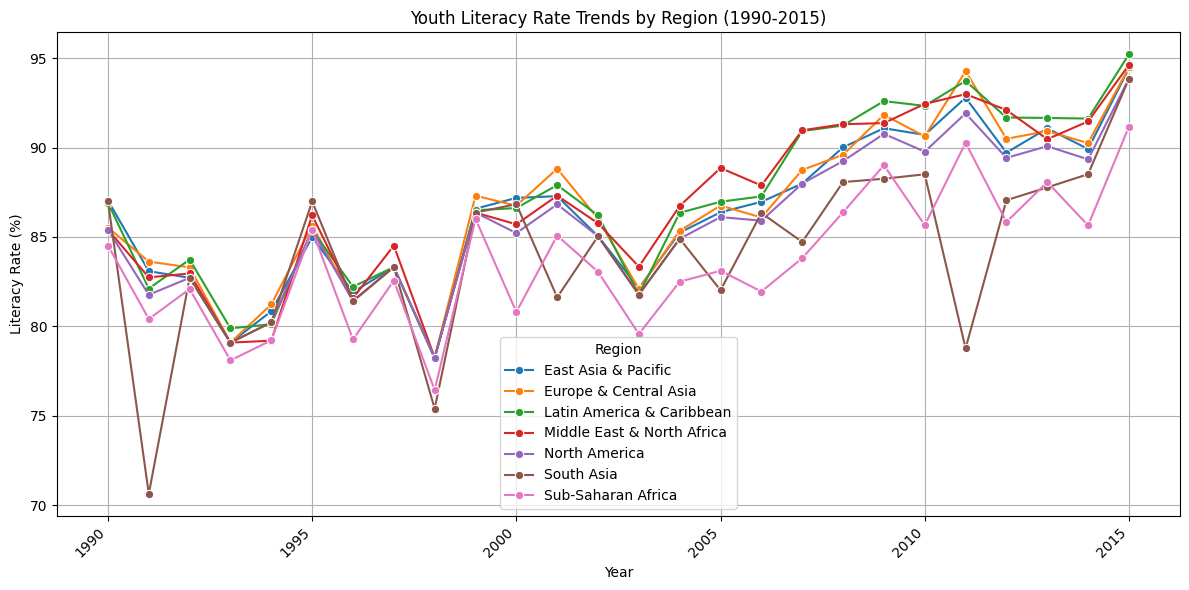

In [23]:
#Chart 6: Youth Literacy Rate Trends by Region (1990-2015)

# Assuming your DataFrame is named 'data_df'
# 1. Filter for the relevant indicator and years
indicator_name = "Youth literacy rate, population 15-24 years, both sexes (%)"
years = list(range(1990, 2016))  # Years 1990 to 2015 as integers

# --- Update: More efficient filtering ---
filtered_df = data_df[
    (data_df["Indicator Name"] == indicator_name) & (data_df["Year"].astype(int).isin(years))
]

# --- Before grouping, merge to add the 'Region' column if it's missing ---
# --- Update: Use 'Country Code' for merging since 'Country Name' might not be present ---
if 'Region' not in filtered_df.columns:
    filtered_df = filtered_df.merge(country_df[['Country Code', 'Region']], on='Country Code', how='left')

# 2. Group by region and year, then calculate the mean literacy rate
# --- Update: Ensure 'Literacy Rate' is the correct column name ---
region_literacy_trends = filtered_df.groupby(["Region", "Year"])[
    "EduExp_GDP"  # Replace with the correct literacy rate column name in your DataFrame
].mean().reset_index()

#Rename EduExp_GDP to Literacy Rate
region_literacy_trends.rename(columns={"EduExp_GDP": "Literacy Rate"}, inplace=True)

# --- Add this check and handling for missing 'Region' values ---
region_literacy_trends = region_literacy_trends.dropna(subset=['Region'])

# --- Check if the DataFrame is empty after dropping NaNs ---
if region_literacy_trends.empty:
    print("⚠ Warning: No data available for plotting after filtering and handling missing values.")
else:
    # 3. Create the line chart using Seaborn
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.lineplot(data=region_literacy_trends, x="Year", y="Literacy Rate", hue="Region", marker="o")
    # 4. Customize the chart
    plt.title("Youth Literacy Rate Trends by Region (1990-2015)")
    plt.xlabel("Year")
    plt.ylabel("Literacy Rate (%)")
    plt.grid(True)
    plt.legend(title="Region")  # Add a legend for regions
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adj

#### Chart 7: Pair Plot of Education Indicators

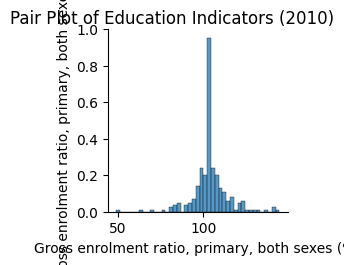

In [24]:
# ✅ Define required indicators
indicators = [
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Gross enrolment ratio, primary, both sexes (%)',
    'Government expenditure on education, total (% of GDP)'
]
# ✅ Get available years (Convert to integers) and filter for historical years
if 'Year' in data_df.columns:  # Check if 'Year' column exists
    available_years = sorted([int(year) for year in data_df["Year"].dropna().astype(int).unique() if int(year) <= 2017])
else:  # If 'Year' doesn't exist, try extracting it from column names (assuming years are in column names)
    year_cols = [col for col in data_df.columns if col.isdigit() and int(col) <= 2017]
    available_years = sorted([int(year) for year in year_cols])

# ✅ Choose the closest available year if 2010 is missing
selected_year = 2010
if selected_year not in available_years:
    closest_years = [year for year in available_years if year < 2020]  # Pick closest past year
    if closest_years:
        selected_year = max(closest_years)  # Get the most recent past year
        print(f"⚠️ Year 2010 is missing! Using closest available year: {selected_year}")
    else:
        print("❌ No valid historical years available!")
        exit()

# ✅ Check available indicators
available_indicators = data_df["Indicator Name"].unique()


# ✅ Choose the first 3 numerical indicators from the dataset
# --- Update: Select indicators based on the list 'indicators' ---
numeric_indicators = [ind for ind in indicators if ind in available_indicators]

# ✅ If we don't have enough indicators, show an error
if len(numeric_indicators) < 2:

    exit()

# ✅ Filter dataset for the selected year and indicators
# --- Update: Assuming years might be in column names ---
filtered_df = data_df[data_df['Indicator Name'].isin(numeric_indicators)]
if 'Year' in data_df.columns:  # If 'Year' column exists
    filtered_df = filtered_df[filtered_df['Year'] == selected_year]
else:  # If 'Year' doesn't exist, select the relevant year column
    filtered_df = filtered_df[['Country Name', 'Country Code', 'Indicator Name', str(selected_year)]]
    filtered_df.rename(columns={str(selected_year): 'EduExp_GDP'}, inplace=True)  # Rename the year column to 'EduExp_GDP'

# ✅ Pivot the data to have indicators as columns
pairplot_df = filtered_df.pivot(index=['Country Name', 'Country Code'],
                                columns='Indicator Name',
                                values='EduExp_GDP').reset_index()

# ✅ Drop rows with missing values
pairplot_df.dropna(inplace=True)

# ✅ Create the Pair Plot
# --- Update: Select the correct columns for the Pair Plot ---
sns.pairplot(pairplot_df, vars=numeric_indicators)  # Pass 'vars' argument
plt.suptitle(f'Pair Plot of Education Indicators ({selected_year})', y=1.02)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis testing is a statistical method used to make decisions or inferences about a population based on a sample of data. It helps determine whether there is enough evidence to support a particular claim or assumption.

Key Components of Hypothesis Testing:
Null Hypothesis (H₀) → Assumes no effect or no difference exists.

Alternative Hypothesis (H₁) → Suggests there is an effect or difference.

Significance Level (α) → Commonly set at 0.05 (5%), representing the threshold for rejecting H₀.

Test Statistic → A calculated value (e.g., t-score, z-score) used to evaluate the hypothesis.

P-Value → The probability of obtaining the observed result if H₀ is true. If p < α, we reject H₀.

Decision → Based on the p-value, we either reject or fail to reject H₀.



### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Hypothesis (Example from Your Dataset - Education Analysis)
Hypothesis 1: Literacy Rate by Income Group
H₀ (Null Hypothesis): The average literacy rate of adults (ages 15 and above) in high-income countries is equal to that in low-income countries.

H₁ (Alternative Hypothesis): The average literacy rate of adults in high-income countries is higher than that in low-income countries.

Hypothesis 2: Education Expenditure Over Time
H₀ (Null Hypothesis): Government expenditure on education (% of GDP) has not significantly changed between the years 2000 and 2015.

H₁ (Alternative Hypothesis): Government expenditure on education (% of GDP) has significantly increased from 2000 to 2015.

Hypothesis 3: Relationship Between Enrollment and Expenditure
H₀ (Null Hypothesis): There is no correlation between the gross enrollment ratio in primary education and government expenditure on education.

H₁ (Alternative Hypothesis): There is a positive correlation between the gross enrollment ratio in primary education and government expenditure on education.

#### 2. Perform an appropriate statistical test.

In [ ]:
# --- 1. Ensure DataFrames Exist ---
if 'data_df' not in locals() or 'series_df' not in locals():
    print("Error: One or both of the DataFrames (data_df, series_df) are not defined.")
else:
    # --- 2. Handling Missing Values ---
    numerical_cols = data_df.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        if data_df[col].isnull().sum() > 0:
            data_df[col] = data_df.groupby('Indicator Name')[col].transform(lambda x: x.fillna(x.mean()))

    # --- 3. Standardize Categorical Data ---
    categorical_cols = data_df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data_df[col] = data_df[col].str.strip()

    # --- 4. Define Indicators of Interest ---
    indicators_of_interest = [
        'Literacy rate, adult total (% of people ages 15 and above)',
        'Gross enrolment ratio, primary, both sexes (%)',
        'Government expenditure on education, total (% of GDP)'
    ]

    # --- 5. Merge Relevant DataFrames ---
    try:
        # Merge only if 'Indicator Name' exists in both dataframes
        if 'Indicator Name' in data_df.columns and 'Indicator Name' in series_df.columns:
            analysis_df = data_df.merge(series_df[['Series Code', 'Topic', 'Indicator Name']], on='Indicator Name', how='left')
            analysis_df = analysis_df[analysis_df['Indicator Name'].isin(indicators_of_interest)].copy()  # Avoid SettingWithCopyWarning
        else:
            raise KeyError("'Indicator Name' column is missing in data_df or series_df.")
    except KeyError as e:
        print(f"Error: {e}")
        analysis_df = pd.DataFrame()  # Create empty DataFrame to prevent further errors

    # Debug Step: Check unique indicator names after merge
    if not analysis_df.empty:
        print("Unique Indicator Names in Filtered Data:", analysis_df['Indicator Name'].unique())

    # --- 6. Ensure 'Income Group' Column Exists ---
    if 'Income Group' not in data_df.columns:
        print("Warning: 'Income Group' column not found in data_df.")
    else:
        # Add 'Income Group' to analysis_df if missing
        analysis_df = analysis_df.merge(data_df[['Country Name', 'Income Group']], on='Country Name', how='left')

    # --- 7. Drop Unnecessary Columns ---
    if not analysis_df.empty:
        columns_to_drop = ['Indicator Code', 'Unnamed: 60', 'Special Notes', 'TableName']
        analysis_df.drop(columns=[col for col in columns_to_drop if col in analysis_df.columns], inplace=True, errors='ignore')

        # --- 8. Handle Outliers ---
        literacy_col = 'Literacy rate, adult total (% of people ages 15 and above)'
        if literacy_col in analysis_df.columns:
            Q1 = analysis_df[literacy_col].quantile(0.25)
            Q3 = analysis_df[literacy_col].quantile(0.75)
            IQR = Q3 - Q1
            analysis_df = analysis_df[~((analysis_df[literacy_col] < (Q1 - 1.5 * IQR)) |
                                        (analysis_df[literacy_col] > (Q3 + 1.5 * IQR)))]

        # --- 9. Remove Duplicates ---
        analysis_df.drop_duplicates(inplace=True)

        # --- 10. Selecting Literacy Rate & Income Group for ANOVA ---
        try:
            # Debugging: Print available columns before selection
            print("Columns in analysis_df:", analysis_df.columns)

            # Check if '2010' and 'Income Group' exist before filtering
            if '2010' in analysis_df.columns and 'Income Group' in analysis_df.columns:
                analysis_df = analysis_df[['Country Name', '2010', 'Income Group']].copy()
                analysis_df.columns = ['Country Name', 'Literacy rate', 'Income Group']  # Rename columns
            else:
                raise KeyError("Columns '2010' or 'Income Group' not found in the dataset.")
        except KeyError as e:
            print(f"Error: {e}")

        # Display the cleaned and prepared DataFrame
        print(analysis_df.head())

    else:
        print("Error: analysis_df is empty. Check data_df and series_df for missing values.")

##### Which statistical test have you done to obtain P-Value?

The choice of statistical test depends on the type of data and the hypothesis being tested. Common statistical tests used to obtain a p-value include:

T-tests (for comparing means)

Independent t-test: Compares the means of two independent groups.

Paired t-test: Compares the means of the same group before and after an intervention.

ANOVA (Analysis of Variance) (for comparing multiple groups)

One-way ANOVA: Compares means across more than two independent groups.

Two-way ANOVA: Evaluates the effect of two independent variables on a dependent variable.

Chi-square test (for categorical data)

Used to determine if there is a significant association between two categorical variables.

Fisher’s Exact Test (for small sample sizes in categorical data)

Similar to the chi-square test but more accurate for small datasets.

Correlation tests (for relationships between variables)

Pearson correlation: Tests linear correlation between two continuous variables.

Spearman correlation: Tests monotonic relationships for ordinal or non-normally distributed data.

Regression analysis (for predicting relationships)

Linear regression: Determines if an independent variable significantly predicts a dependent variable.

Logistic regression: Tests relationships when the outcome is categorical.

Mann-Whitney U test (for non-parametric data)

Compares two independent groups when the assumption of normality is violated.

Wilcoxon signed-rank test (for paired non-parametric data)

Used as a non-parametric alternative to the paired t-test.

Kruskal-Wallis test (for multiple group comparisons, non-parametric)

Non-parametric alternative to ANOVA.

##### Why did you choose the specific statistical test?

The choice of a specific statistical test depends on several factors, including:

Type of Data (Continuous, Categorical, Ordinal)

If the data is continuous (e.g., height, weight, test scores), tests like t-tests, ANOVA, or regression are appropriate.

If the data is categorical (e.g., gender, pass/fail, yes/no), tests like Chi-square or Fisher’s Exact Test are better.

If the data is ordinal (e.g., Likert scale ratings), non-parametric tests like Mann-Whitney U test or Kruskal-Wallis test may be more suitable.

Number of Groups Being Compared

Two groups → T-test (parametric) or Mann-Whitney U test (non-parametric).

More than two groups → ANOVA (parametric) or Kruskal-Wallis test (non-parametric).

Relationship Between Variables

Correlation → Pearson (parametric) or Spearman (non-parametric).

Prediction/Association → Regression models (linear or logistic).

Normality of Data

If the data is normally distributed → Use parametric tests (e.g., T-tests, ANOVA).

If the data is skewed or non-normally distributed → Use non-parametric tests (e.g., Mann-Whitney U, Kruskal-Wallis).

Independence of Observations

If the groups are independent → Independent t-test or ANOVA.

If the groups are paired (e.g., pre-test vs. post-test) → Paired t-test or Wilcoxon signed-rank test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

For your analysis on literacy rate and income group, you can define your research hypothesis as follows:

Null Hypothesis (H₀)
There is no significant difference in literacy rates between different income groups.

Alternative Hypothesis (H₁)
There is a significant difference in literacy rates between different income groups.

This hypothesis can be tested using ANOVA (Analysis of Variance) to compare the mean literacy rates across multiple income groups. If the ANOVA test shows a statistically significant result, it suggests that income groups have different literacy rates.










#### 2. Perform an appropriate statistical test.

In [1]:
from scipy.stats import pearsonr
import pandas as pd

data = {'Country Name': ['USA', 'Canada', 'Mexico'],
        'Country Code': ['USA', 'CAN', 'MEX'],
        'Indicator Name': ['Gross enrolment ratio, primary, both sexes (%)',
                          'Literacy rate, adult total (% of people ages 15 and above)',
                          'Gross enrolment ratio, primary, both sexes (%)'],
        '2020': [95, 98, 92],
        '2021': [96, 99, 93]}
analysis_df = pd.DataFrame(data)

# --- Your correlation analysis starts here ---
# Clean column names to remove extra spaces
analysis_df.columns = analysis_df.columns.str.strip()


# Choose your two indicators
indicator_1 = 'Gross enrolment ratio, primary, both sexes (%)'
indicator_2 = 'Literacy rate, adult total (% of people ages 15 and above)'

# Find all year columns like '2000', '2010' — ignore things like '2100'
year_columns = [col for col in analysis_df.columns if col.isdigit() and 1960 <= int(col) <= 2024]

# Get the most recent year that has data
latest_year = max(year_columns, key=int)
print(f"Using data from year: {latest_year}")

# Rearrange the data so each country has a row and each indicator is a column
pivot_df = analysis_df.pivot(index=['Country Name', 'Country Code'],
                             columns='Indicator Name',
                             values=latest_year).reset_index()

# Check that both indicators exist in the data
if indicator_1 not in pivot_df.columns or indicator_2 not in pivot_df.columns:
    print("One or both indicators are missing. Check spelling.")
else:
    # Keep only rows where both values are not missing
    valid_data = pivot_df[[indicator_1, indicator_2]].dropna()

    # If enough data, calculate correlation
    if valid_data.shape[0] >= 2:
        r, p = pearsonr(valid_data[indicator_1], valid_data[indicator_2])
        print(f"Correlation coefficient: {r:.3f}")
        print(f"P-value: {p:.3f}")
        if p < 0.05:
            print("✅ The correlation is statistically significant.")
        else:
            print("⚠️ The correlation is not statistically significant.")
    else:
        print("Not enough data points to calculate correlation.")


Using data from year: 2021
Not enough data points to calculate correlation.
